## DSC530- ASSIGNMENT 12.2 
## Author: Vivek, Giri
## Date: 2024-11-15
## Final Project 


#                                             🎬 NETFLIX : “See What's Next”📭

Netflix is a subscription-based streaming service that allows our members to watch TV shows and movies without commercials on an internet-connected device. You can also download TV shows and movies to your iOS, Android, or Windows 10 device and watch without an internet connection.This is an EDA or a story telling through its data along with awide range of different graphs and visuals.

# Let's get started!

This dataset consists of tv shows and movies available on Netflix as of 2018. The dataset is collected from Flixable which is a third-party Netflix search engine.

**Loading libraries**

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import thinkstats2
import thinkplot

# 1. Quick look at the data

In [7]:
netflix=pd.read_csv('/Users/vivekgiri/Downloads/netflix_titles.csv')

In [8]:
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [9]:
netflix.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


In [10]:
netflix.shape

(8807, 12)

In [11]:
netflix.duplicated().sum()

0

In [12]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


So, there **8807** records in **12** columns. Also, there are no null records as well as duplicate values.

* show_id: unique id of each show (not much of a use for us in this notebook)
* type: The category of a show, can be either a Movie or a TV Show
* title: Name of the show
* director: Name of the director(s) of the show 
* cast: Name of actors and other cast of the show 
* country: Name of countries the show is available to watch on Netflix
* date_added: Date when the show was added on Netflix
* release_year: Release year of the show
* rating: Show rating on netflix
* duration: Time duration of the show
* listed_in: Genre of the show
* description: Some text describing the show

# 2 .Dealing with the missing data

In [13]:
netflix['date_added']=pd.to_datetime(netflix['date_added'])

In [14]:
netflix['month_added']=netflix['date_added'].dt.month
netflix['year_added']=netflix['date_added'].dt.year



In [15]:
netflix.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
month_added       10
year_added        10
dtype: int64

In [16]:
for i in netflix.columns:
    null_rate = netflix[i].isna().sum()/len(netflix) * 100
    if null_rate > 0 :
        print("{} null rate: {}%".format(i,round(null_rate,2)))

director null rate: 29.91%
cast null rate: 9.37%
country null rate: 9.44%
date_added null rate: 0.11%
rating null rate: 0.05%
duration null rate: 0.03%
month_added null rate: 0.11%
year_added null rate: 0.11%


From the above, We can say director,cast,country date_added,rating and duration columns found null records. Need to remove null values.

In [17]:
netflix['country'] = netflix['country'].fillna(netflix['country'].mode()[0])
netflix['cast'].replace(np.nan,'No data',inplace=True)
netflix['director'].replace(np.nan,'No data',inplace=True)
netflix.dropna(inplace=True)
netflix.drop_duplicates(inplace=True)

In [18]:
netflix.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
month_added     0
year_added      0
dtype: int64

In [19]:
netflix['month_added']=netflix['month_added'].astype(np.int64)
netflix['year_added']=netflix['year_added'].astype(np.int64)

In [20]:
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No data,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",9,2021
1,s2,TV Show,Blood & Water,No data,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",9,2021
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,9,2021
3,s4,TV Show,Jailbirds New Orleans,No data,No data,United States,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",9,2021
4,s5,TV Show,Kota Factory,No data,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,9,2021


# 3-Exploratory Data Analysis - EDA

# **Analysis of Movies vs TV Shows.**

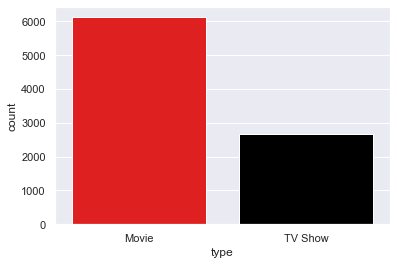

In [21]:
sns.set(style="darkgrid")
ax = sns.countplot(x="type", data=netflix, palette=('Red','Black'))

The growth in number of movies on netflix is much higher than that of TV shows

# **Movie Ratings Analysis:**

* TV-MA:This program is specifically designed to be viewed by adults and therefore may be unsuitable for children under 17.
* TV-14:This program contains some material that many parents would find unsuitable for children under 14 years of age.
* TV-PG:This program contains material that parents may find unsuitable for younger children.
* R:Under 17 requires accompanying parent or adult guardian,Parents are urged to learn more about the film before taking their young children with them.
* PG-13:Some material may be inappropriate for children under 13. Parents are urged to be cautious. Some material may be inappropriate for pre-teenagers.
* NR or UR:If a film has not been submitted for a rating or is an uncut version of a film that was submitted
* PG:Some material may not be suitable for children,May contain some material parents might not like for their young children.
* TV-Y7:This program is designed for children age 7 and above.
* TV-G:This program is suitable for all ages.
* TV-Y:Programs rated TV-Y are designed to be appropriate for children of all ages. The thematic elements portrayed in programs with this rating are specifically designed for a very young audience, including children ages 2-6.
* TV-Y7-FV:is recommended for ages 7 and older, with the unique advisory that the program contains fantasy violence.
* G:All ages admitted. Nothing that would offend parents for viewing by children.
* NC-17:No One 17 and Under Admitted. Clearly adult. Children are not admitted.

here we discover that UR and NR is the same rating(unrated,Not rated Uncut/extended versions of films that are labeled "Unrated" also contain warnings saying that the uncut version of the film contains content that differs from the theatrical release and might not be suitable for minors.so we have the fix this.

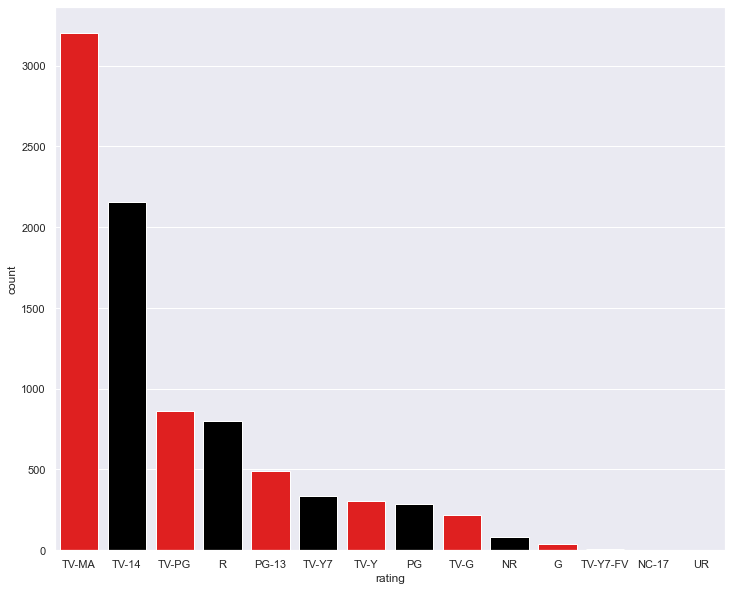

In [22]:
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(x="rating", data=netflix, palette=('Red','Black'), order=netflix['rating'].value_counts().index[0:15])

The largest count of movies are made with the 'TV-MA' rating."TV-MA" is a rating assigned by the TV Parental Guidelines to a television program that was designed for mature audiences only.

Second largest is the 'TV-14' stands for content that may be inappropriate for children younger than 14 years of age.

Third largest is the very popular 'R' rating.An R-rated film is a film that has been assessed as having material which may be unsuitable for children under the age of 17 by the Motion Picture Association of America.

# Popular Genres Analysis:

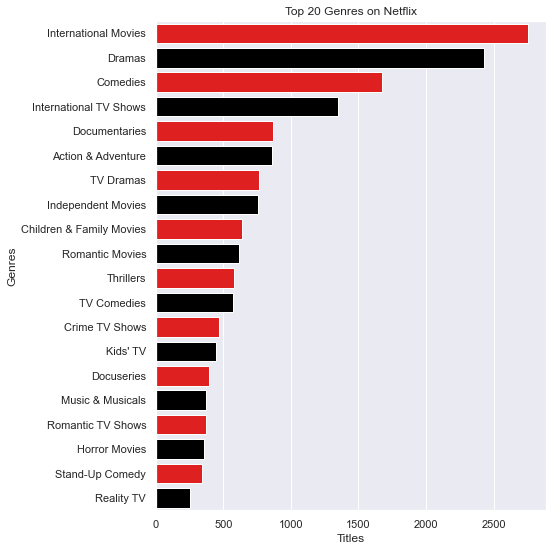

In [23]:
filtered_genres = netflix.set_index('title').listed_in.str.split(', ', expand=True).stack().reset_index(level=1, drop=True);

plt.figure(figsize=(7,9))
g = sns.countplot(y = filtered_genres, order=filtered_genres.value_counts().index[:20],palette=('Red','Black'))
plt.title('Top 20 Genres on Netflix')
plt.xlabel('Titles')
plt.ylabel('Genres')
plt.show()

In terms of genres, international movies takes the cake surprisingly followed by dramas and comedies. Even though the United States has the most content available, it looks like Netflix has decided to release a ton of international movies. The reason for this could be that most Netflix subscribers aren't actually in the United States, but rather the majority of viewers are actually international subscribers.

# Released Year Wise Analysis:

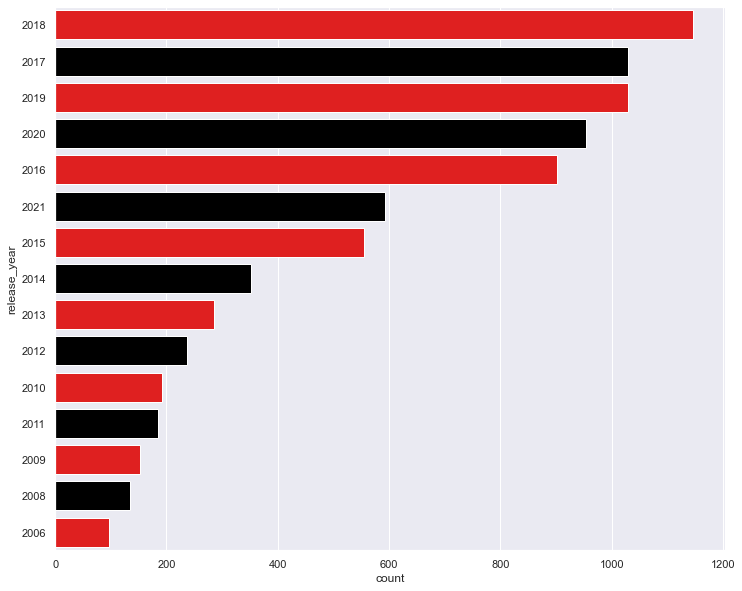

In [24]:
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(y="release_year", data=netflix, palette=('Red','Black'), order=netflix['release_year'].value_counts().index[0:15])
plt.show()

So, 2018 was the year when most of the movies were released.

# Added Year Wise Analysis:

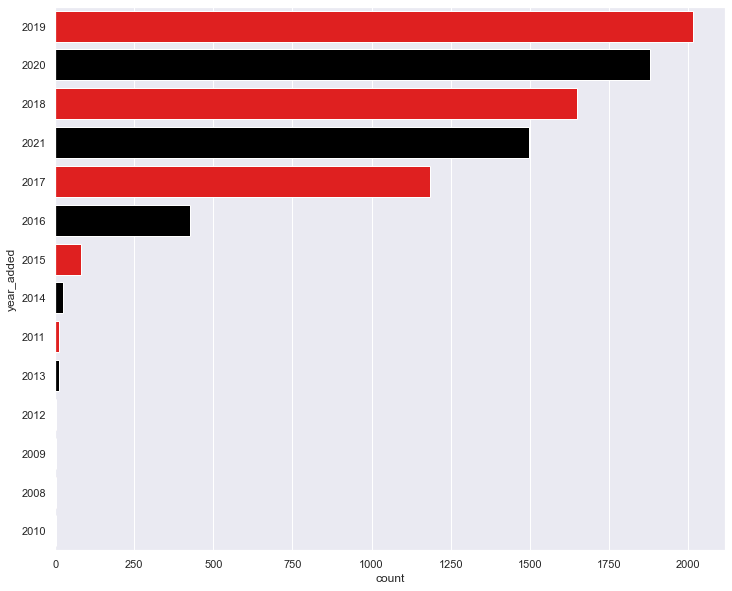

In [25]:
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(y="year_added", data=netflix, palette=('Red','Black'), order=netflix['year_added'].value_counts().index[0:15])
plt.show()

So, 2019 was the year when most of the movies were added on Netflix.

# Added Month Wise Analysis:

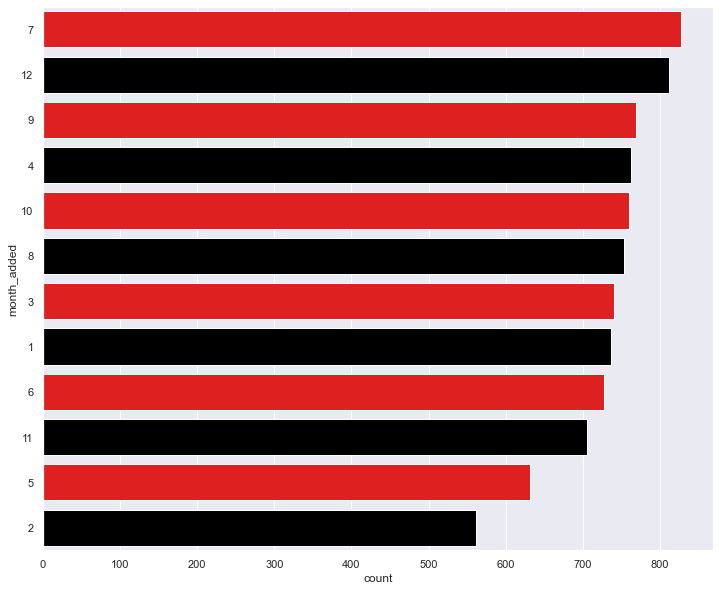

In [26]:
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(y="month_added", data=netflix, palette=('Red','Black'), order=netflix['month_added'].value_counts().index[0:15])
plt.show()

So, Dec is the month when most of the movies were added on Netflix.

# Countries with highest rated content Analysis:

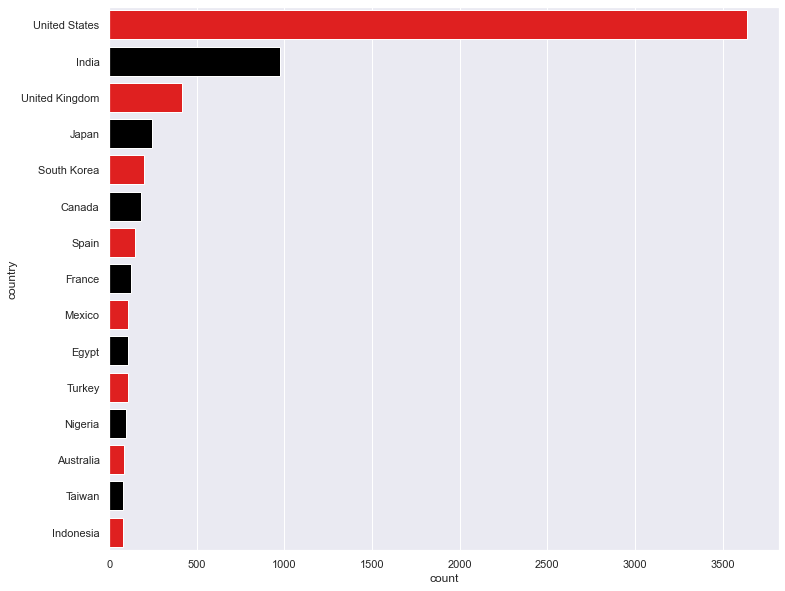

In [27]:
plt.figure(figsize=(12,10))

ax = sns.countplot(y="country", data=netflix, order=netflix['country'].value_counts().index[0:15],palette=('Red','Black'))

United States have highest rated content on the netflix.

# **Mean, Mode, spread,Std Deviation**

In [28]:
netflix.describe()

,release_year,month_added,year_added
count,8790.000000,8790.000000,8790.000000
mean,2014.183163,6.655859,2018.873606
std,8.825466,3.436103,1.573568
min,1925.000000,1.000000,2008.000000
25%,2013.000000,4.000000,2018.000000
50%,2017.000000,7.000000,2019.000000
75%,2019.000000,10.000000,2020.000000
max,2021.000000,12.000000,2021.000000


# PMF of year_added

In [29]:
netflix_movies=netflix[netflix["type"]=="Movie"]
netflix_shows=netflix[netflix["type"]=="TV Show"]

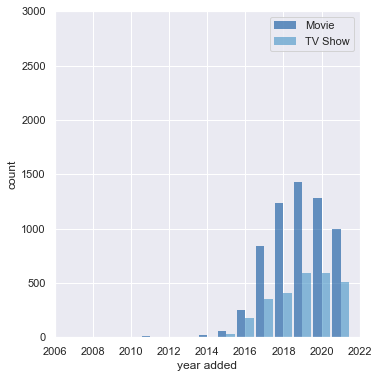

In [30]:
hist1 = thinkstats2.Hist(netflix_movies.year_added, label='Movie')
hist2 = thinkstats2.Hist(netflix_shows.year_added, label='TV Show')

width=0.45
axis = [2006, 2022, 0, 3000]
thinkplot.PrePlot(2, cols=2)

thinkplot.Hist(hist1, align='right', width=width)
thinkplot.Hist(hist2, align='left', width=width)
thinkplot.Config(xlabel='year added', ylabel='count', axis=axis)

In [31]:
movie_pmf = thinkstats2.Pmf(netflix_movies.year_added, label='Movie')
show_pmf = thinkstats2.Pmf(netflix_shows.year_added, label='TV Show')

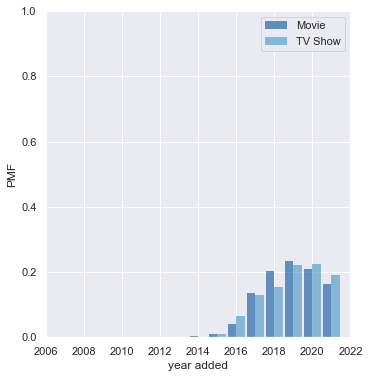

In [32]:
width=0.45
axis = [2006, 2022, 0, 1]
thinkplot.PrePlot(2, cols=2)
thinkplot.Hist(movie_pmf, align='right', width=width)
thinkplot.Hist(show_pmf, align='left', width=width)
thinkplot.Config(xlabel='year added', ylabel='PMF', axis=axis)

Based on the PMF plot, we can say that more TV shows are added than Movies in 2020.
But as per histogram it shows that more movies are added in 2020.


# CDF of year_added

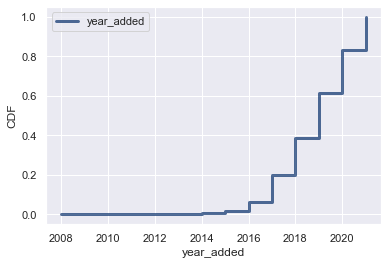

In [33]:
cdf = thinkstats2.Cdf(netflix.year_added, label='year_added')
thinkplot.Cdf(cdf)
thinkplot.Config(xlabel='year_added', ylabel='CDF', loc='upper left')

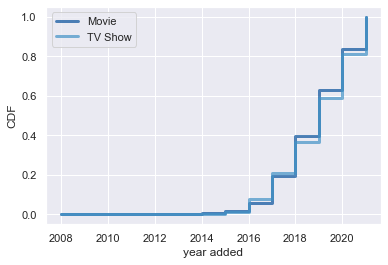

In [34]:
movies_cdf = thinkstats2.Cdf(netflix_movies.year_added, label='Movie')
shows_cdf = thinkstats2.Cdf(netflix_shows.year_added, label='TV Show')

thinkplot.PrePlot(2)
thinkplot.Cdfs([movies_cdf, shows_cdf])
thinkplot.Config(xlabel='year added', ylabel='CDF')

The CDF shows that around 80% of the current netflix movies and shoes were added between 2016 to 2019.

# Normal distribution of year_released

A normal probability plot is a visual test for normality.  The following example shows that if the data are actually from a normal distribution, the plot is approximately straight.

In [35]:
year_added=netflix.year_added
year_released=netflix.release_year
month_added=netflix.month_added

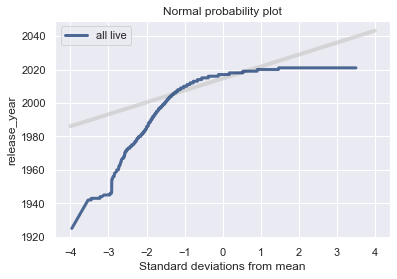

In [36]:
mean, var = thinkstats2.TrimmedMeanVar(year_released, p=0.01)
std = np.sqrt(var)

xs = [-4, 4]
fxs, fys = thinkstats2.FitLine(xs, mean, std)
thinkplot.Plot(fxs, fys, linewidth=4, color='0.8')

xs, ys = thinkstats2.NormalProbability(year_released)
thinkplot.Plot(xs, ys, label='all live')

thinkplot.Config(title='Normal probability plot',
                 xlabel='Standard deviations from mean',
                 ylabel='release_year')

Here's the normal probability plot for released_year.
The line is not straight that means the released year for the Netflix content is not uniform.

# Scatter plot of year_added vs release_year

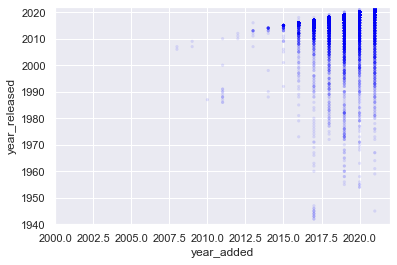

In [37]:
thinkplot.Scatter(year_added, year_released, alpha=0.1, s=10)
thinkplot.Config(xlabel='year_added',
                 ylabel='year_released',
                 axis=[2000, 2022, 1940, 2022],
                 legend=False)

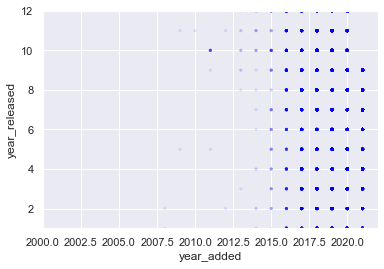

In [38]:
thinkplot.Scatter(year_added, month_added, alpha=0.1, s=10)
thinkplot.Config(xlabel='year_added',
                 ylabel='year_released',
                 axis=[2000, 2022, 1, 12],
                 legend=False)

In [39]:
def Cov(xs, ys, meanx=None, meany=None):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    if meanx is None:
        meanx = np.mean(xs)
    if meany is None:
        meany = np.mean(ys)

    cov = np.dot(xs-meanx, ys-meany) / len(xs)
    return cov

In [40]:
def Corr(xs, ys):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    meanx, varx = thinkstats2.MeanVar(xs)
    meany, vary = thinkstats2.MeanVar(ys)

    corr = Cov(xs, ys, meanx, meany) / np.sqrt(varx * vary)
    return corr

In [41]:
Cov(year_added, year_released)

1.5499992881558193

In [42]:
Corr(year_added, year_released)

0.11162406569741139

The positive covariance and correlation shows that there is strong relation between year_added and year_released for any content on netflix.

In [43]:
Cov(year_added, month_added)

-0.868525680102402

In [44]:
Corr(year_added, month_added)

-0.1606499258572488

The negative covariance and correlation shows that there is inverse relation between year_added and month_added for any content on netflix.

# Permutation test

In [45]:
#To compute the p-value of an observed difference in means, we can assume that there is no difference between the groups and generate simulated results by shuffling the data.

class DiffMeansPermute(thinkstats2.HypothesisTest):

    def TestStatistic(self, data):
        group1, group2 = data
        test_stat = abs(group1.mean() - group2.mean())
        return test_stat

    def MakeModel(self):
        group1, group2 = self.data
        self.n, self.m = len(group1), len(group2)
        self.pool = np.hstack((group1, group2))

    def RunModel(self):
        np.random.shuffle(self.pool)
        data = self.pool[:self.n], self.pool[self.n:]
        return data

In [41]:
# Testing correlation
#To check whether an observed correlation is statistically significant, we can run a permutation test with a different test statistic.

class CorrelationPermute(thinkstats2.HypothesisTest):

    def TestStatistic(self, data):
        xs, ys = data
        test_stat = abs(thinkstats2.Corr(xs, ys))
        return test_stat

    def RunModel(self):
        xs, ys = self.data
        xs = np.random.permutation(xs)
        return xs, ys

In [46]:
# Chi-square test of pregnancy length
class PregLengthTest(thinkstats2.HypothesisTest):

    def MakeModel(self):
        firsts, others = self.data
        self.n = len(firsts)
        self.pool = np.hstack((firsts, others))

        pmf = thinkstats2.Pmf(self.pool)
        self.values = range(35, 44)
        self.expected_probs = np.array(pmf.Probs(self.values))

    def RunModel(self):
        np.random.shuffle(self.pool)
        data = self.pool[:self.n], self.pool[self.n:]
        return data
    
    def TestStatistic(self, data):
        firsts, others = data
        stat = self.ChiSquared(firsts) + self.ChiSquared(others)
        return stat

    def ChiSquared(self, lengths):
        hist = thinkstats2.Hist(lengths)
        observed = np.array(hist.Freqs(self.values))
        expected = self.expected_probs * len(lengths)
        stat = sum((observed - expected)**2 / expected)
        return stat

In [47]:
def RunTests(live, iters=1000):
    """
    live: DataFrame
    iters: how many iterations to run
    """
    n = len(live)
    netflix_movies=netflix[netflix["type"]=="Movie"]
    netflix_shows=netflix[netflix["type"]=="TV Show"]

    data = netflix_movies.year_added.values, netflix_shows.year_added.values
    ht = DiffMeansPermute(data)
    p1 = ht.PValue(iters=iters)
    
    print('%d\t%0.2f' % (n, p1))

In [48]:
n = len(netflix)
print('n   ->  P')
for _ in range(7):
    sample = thinkstats2.SampleRows(netflix, n)
    RunTests(sample)
    n //= 2

n   ->  P
8790	0.04
4395	0.05
2197	0.04
1098	0.05
549	0.04
274	0.05
137	0.04


Test: difference in mean year TV shows and movies added on Netflix 

Conclusion: As expected, tests that are positive with large sample sizes become negative as we take away data.  But the pattern is erratic, with some positive tests even at small sample sizes.


# Linear Regration of year_added ~ release_year

In [49]:
import statsmodels.formula.api as smf

formula = 'year_added ~ release_year'
model = smf.ols(formula, data=netflix)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             year_added   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     110.9
Date:                Mon, 11 Nov 2024   Prob (F-statistic):           8.95e-26
Time:                        12:07:05   Log-Likelihood:                -16402.
No. Observations:                8790   AIC:                         3.281e+04
Df Residuals:                    8788   BIC:                         3.282e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     1978.7865      3.807    519.775      0.000    1971.324    1986.249
release_year     0.0199      0.002     10.530      0.000       0.016       0.024
==============================================================================
Omnibus:                      749.836   Durbin-Watson:                   0.422
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1128.347
Skew:                          -0.667   Prob(JB):                    9.61e-246
Kurtosis:                       4.140   Cond. No.                     4.60e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.6e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# **Final note:**

As we noted through this notebook; Netflix is very popular among various social classes, and as we all know it has increased in popularity during the Covid-19 pandemic.

Netflix is continuedly adding new content on their platform. We can see exponential growth in new content after 2016.

Most of the content added on Netflix in 2018 and 2019 are released in same year.

There are many different genre available on Netflix to attract wide range of subscribers.